# Final Project -- The Continuing Impact of COVID-19
### Katie Fasola

For my final project, I decided to analyze relationships between countries regarding the trends of the novel coronavirus.  I was hesitant to choose this topic due to its 'popularity'; however, I am curious in the subject as it is constantly evolving.  I last pulled the data on April 7, 2020.  

My goal for this project is to analyze trends of the coronavirus.  More specifically, I want to see if there was a correlation between economic statistics for certain countries and the toll the virus has taken there.  For example, have countries which spend a higher percentage of their GDP on health expenditures been less affected by the disease?  Or, are those countries with a larger population of elderly (aged 65+) more susceptible to higher death rates due to the virus?  

I downloaded all of my data from the [World Health Organization](https://www.who.int/data/gho) or the [Humanitarian Data Exchange](https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases).  The data from the Humanitarian Data Exchange is where I obtained the data about the coronavirus.  To quote their website, "The data is compiled by the Johns Hopkins University Center for Systems Science and Engineering (JHU CCSE) from various sources including the World Health Organization (WHO), DXY.cn. Pneumonia. 2020, BNO News, National Health Commission of the People’s Republic of China (NHC), China CDC (CCDC), Hong Kong Department of Health, Macau Government, Taiwan CDC, US CDC, Government of Canada, Australia Government Department of Health, European Centre for Disease Prevention and Control (ECDC), Ministry of Health Singapore (MOH)."

Seeing a reputable name like John Hopkins, I know this is trusted and accurate data.  Also, considering one of their sources is the World Health Organization (WHO), I believe my datasets will be compatible.

> ## Introduction

Seen below are the packages I installed for this project.  These packages are the same we utilized in class, including pandas, matplotlib, seaborn, altair, etc.

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.image as img 
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import altair as alt
import networkx
import numpy as np
import os
from functools import reduce
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets, linear_model
from sklearn.tree import DecisionTreeClassifier

In [2]:
os.getcwd()

'C:\\Users\\katie\\OneDrive\\Documents\\GitHub\\Fasola_Final_Project'

In [3]:
os.chdir('C:\\Users\\katie\\OneDrive\\Documents\\GitHub\\Fasola_Final_Project\\data')
os.getcwd()

'C:\\Users\\katie\\OneDrive\\Documents\\GitHub\\Fasola_Final_Project\\data'

> ## Global Analysis

I first downloaded global data.  This data is segmented primarily by Country/Region, and then each column after shows dates from January 22, 2020 to April 7, 2020.  Originally, I was under the impression that the *total cases* for each Country was the sum of each column.  However, upon further analysis of the data, each date column is the cumulative count of total cases already.

Additionally, the column 'Province/State' is used to specify certain regions of countries.  For example, Australia will be listed as a country eight times.  This is because of the various states, including Queensland, Tasmania, Victoria, etc.

With that said, I dropped each column except for 'Province/State', 'Country/Region' and '4/7/2020' (showing the most up-to-date data).  Based on that data, I did a `.sum()` to obtain that same value.  Then, I used `.sort_values()` and `.head(10)` to show the top ten countries by province/state with the most COVID-19 cases.

The barplot was created using `plt.bar()`.  It shows the top ten countries by province/state with the most confirmed cases.  

In [4]:
globalcases_covid = pd.read_csv('time_series_covid19_confirmed_global.csv')
globalcases_covid

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020,4/4/2020,4/5/2020,4/6/2020,4/7/2020
0,NaN,Afghanistan,33.00000,65.000000,0,0,0,0,0,0,...,120,170,174,237,273,281,299,349,367,423
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,212,223,243,259,277,304,333,361,377,383
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,511,584,716,847,986,1171,1251,1320,1423,1468
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,334,370,376,390,428,439,466,501,525,545
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,7,7,7,8,8,8,10,14,16,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Falkland Islands (Malvinas),United Kingdom,-51.79630,-59.523600,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,2
259,Saint Pierre and Miquelon,France,46.88520,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
260,NaN,South Sudan,6.87700,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,2
261,NaN,Western Sahara,24.21550,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,4,4


In [5]:
globalcases_covid.drop(globalcases_covid.columns.difference(['Province/State', 'Country/Region', '4/7/2020']), axis=1, inplace=True)
globalcases_covid

,Province/State,Country/Region,4/7/2020
0,NaN,Afghanistan,423
1,NaN,Albania,383
2,NaN,Algeria,1468
3,NaN,Andorra,545
4,NaN,Angola,17
...,...,...,...
258,Falkland Islands (Malvinas),United Kingdom,2
259,Saint Pierre and Miquelon,France,1
260,NaN,South Sudan,2
261,NaN,Western Sahara,4


In [6]:
globalcases_covid['Total Cases'] = globalcases_covid.sum(1)
globalcases_covid

,Province/State,Country/Region,4/7/2020,Total Cases
0,NaN,Afghanistan,423,423
1,NaN,Albania,383,383
2,NaN,Algeria,1468,1468
3,NaN,Andorra,545,545
4,NaN,Angola,17,17
...,...,...,...,...
258,Falkland Islands (Malvinas),United Kingdom,2,2
259,Saint Pierre and Miquelon,France,1,1
260,NaN,South Sudan,2,2
261,NaN,Western Sahara,4,4


In [121]:
global_top10_cases = globalcases_covid.sort_values('Total Cases', ascending=False).head(10)
global_top10_cases

,Province/State,Country/Region,4/7/2020,Total Cases
225,NaN,United States,396223,396223
201,NaN,Spain,141942,141942
137,NaN,Italy,135586,135586
116,NaN,France,109069,109069
120,NaN,Germany,107663,107663
62,Hubei,China,67803,67803
133,NaN,Iran,62589,62589
223,NaN,United Kingdom,55242,55242
213,NaN,Turkey,34109,34109
206,NaN,Switzerland,22253,22253


In [127]:
plt.style.use('fivethirtyeight')

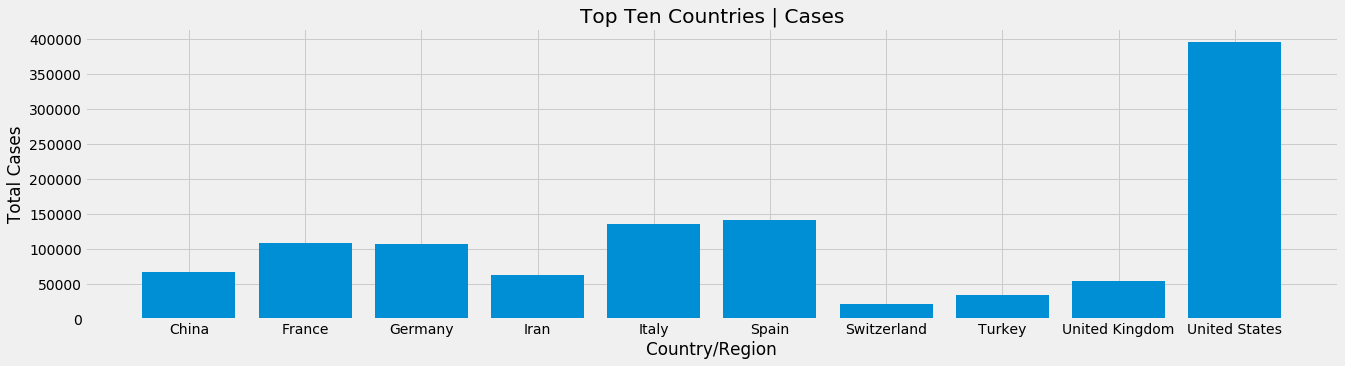

In [128]:
fig, ax = plt.subplots(figsize=(20,5))
plt.bar('Country/Region','Total Cases', data=global_top10_cases.groupby('Country/Region', as_index=False).sum())
plt.title('Top Ten Countries | Cases')
plt.xlabel('Country/Region')
plt.ylabel('Total Cases');

The above datasets include the 'Province/State' column to show a more granular view of the data.  For example, the province of Hubei in China is sixth alone in the total number of cases. 

On the other hand, in the below datasets, I used `.groupby()` to avoid countries being listed more than once (e.g. Australia and China, given the aforementioned data segmentation).

Seen below, the country with the largest number of confirmed cases as of 4/7/2020 is the **United States**.  The United States is followed by Spain and Italy.

Through using a `.groupby().agg()`, I obtained the total number of confirmed cases per country.  Applying `.describe()` to the new dataset, the following statistics are evident:
+ The **average** number of confirmed cases per country is **7,750**.
+ The country with the **most** number of confirmed cases is the United States, with **396,223** confirmed cases.
+ The country with the **least** number of confirmed cases is Timor-Leste (a Southeast Asian island nation), with **one** confirmed case.
+ The **median** number of confirmed cases per country is **327**.

In [126]:
global_groupby = globalcases_covid.groupby('Country/Region').agg( {'Total Cases': ['sum']} )
global_groupby

,Total Cases
,sum
Country/Region,
Afghanistan,423
Albania,383
Algeria,1468
Andorra,545
Angola,17
...,...
Vietnam,249
West Bank and Gaza,261


In [116]:
globalcases_covid_final = global_groupby.sort_values(('Total Cases', 'sum'), ascending=False).head(10)
globalcases_covid_final

,Total Cases
,sum
Country/Region,
United States,396223
Spain,141942
Italy,135586
France,110065
Germany,107663
China,82718
Iran,62589
United Kingdom,55949


In [10]:
global_groupby.median()

Total Cases  sum    327.0
dtype: float64

In [11]:
global_groupby[('Total Cases', 'sum')].describe()

count       184.000000
mean       7750.521739
std       35157.161835
min           1.000000
25%          25.750000
50%         327.000000
75%        1863.000000
max      396223.000000
Name: (Total Cases, sum), dtype: float64

The second dataset I pulled from the Humanitarian Data Exchange was the total number of deaths per Country/Region.  This dataset is segmented the same way as the total cases dataset, primarily by Country/Region.

In [14]:
globaldeaths_covid = pd.read_csv('time_series_covid19_deaths_global.csv')
globaldeaths_covid

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020,4/4/2020,4/5/2020,4/6/2020,4/7/2020
0,NaN,Afghanistan,33.00000,65.000000,0,0,0,0,0,0,...,4,4,4,4,6,6,7,7,11,14
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,10,11,15,15,16,17,20,20,21,22
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,31,35,44,58,86,105,130,152,173,193
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,6,8,12,14,15,16,17,18,21,22
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Falkland Islands (Malvinas),United Kingdom,-51.79630,-59.523600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
259,Saint Pierre and Miquelon,France,46.88520,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260,NaN,South Sudan,6.87700,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,NaN,Western Sahara,24.21550,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
globaldeaths_covid.drop(globaldeaths_covid.columns.difference(['Province/State', 'Country/Region', '4/7/2020']), axis=1, inplace=True)
globaldeaths_covid['Total Deaths'] = globaldeaths_covid.sum(1)
globaldeaths_covid

,Province/State,Country/Region,4/7/2020,Total Deaths
0,NaN,Afghanistan,14,14
1,NaN,Albania,22,22
2,NaN,Algeria,193,193
3,NaN,Andorra,22,22
4,NaN,Angola,2,2
...,...,...,...,...
258,Falkland Islands (Malvinas),United Kingdom,0,0
259,Saint Pierre and Miquelon,France,0,0
260,NaN,South Sudan,0,0
261,NaN,Western Sahara,0,0


Segmenting the data by using `.sort_values()` and `.head(10)`, I am able to obtain the ten countries by province/state with the largest number of deaths due to the coronavirus.  

These ten countries are portrayed in the below barplot.  Using `plt.bar()`, I performed a `.groupby()` to analyze which countries should be portrayed.

As seen below, **Italy** has the largest number of total deaths due to the coronavirus, with **17,127** deaths as of 4/7/2020.

In [16]:
global_top10_deaths = globaldeaths_covid.sort_values('Total Deaths', ascending=False).head(10)
global_top10_deaths

,Province/State,Country/Region,4/7/2020,Total Deaths
137,NaN,Italy,17127,17127
201,NaN,Spain,14045,14045
225,NaN,United States,12722,12722
116,NaN,France,10328,10328
223,NaN,United Kingdom,6159,6159
133,NaN,Iran,3872,3872
62,Hubei,China,3212,3212
169,NaN,Netherlands,2101,2101
23,NaN,Belgium,2035,2035
120,NaN,Germany,2016,2016


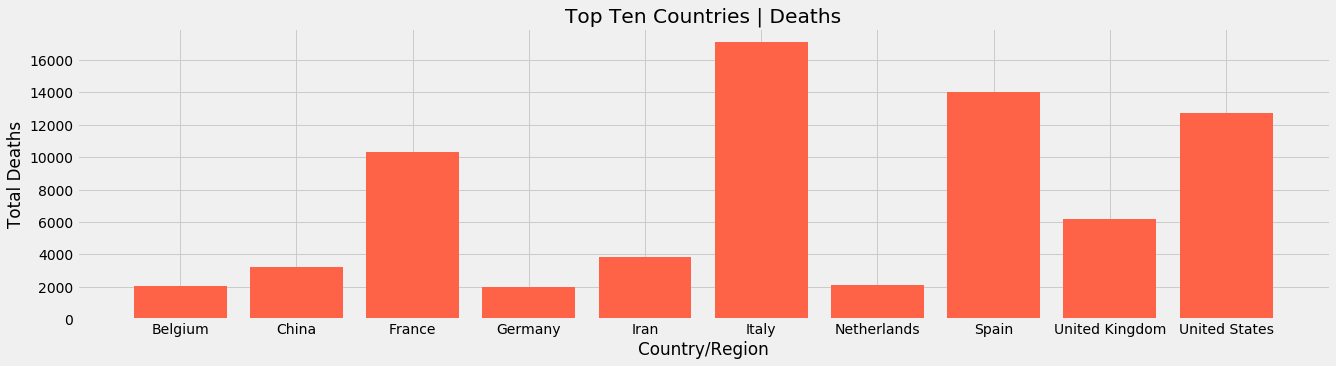

In [17]:
fig, ax = plt.subplots(figsize=(20,5))
plt.bar('Country/Region','Total Deaths', data=global_top10_deaths.groupby('Country/Region', as_index=False).sum(), color='tomato')
plt.title('Top Ten Countries | Deaths')
plt.xlabel('Country/Region')
plt.ylabel('Total Deaths');

Applying `.describe()` to the new dataset, the following statistics are evident:

+ The **average** number of cases resulting in death per country is **7,377**.
+ The country with the **most** number of deaths per case is Italy, with **17,127** cases resulting in death.
+ There are many countries that have reported **0** deaths.  These countries include, but are not limited to, Cambodia, Burundi, and Fiji.
+ The **median** number of deaths due to coronavirus per country is **5,021**.

In [130]:
globaldeaths_groupby = globaldeaths_covid.groupby('Country/Region').agg( {'Total Deaths': ['sum']} )
globaldeaths_groupby

,Total Deaths
,sum
Country/Region,
Afghanistan,14
Albania,22
Algeria,193
Andorra,22
Angola,2
...,...
Vietnam,0
West Bank and Gaza,1


In [144]:
globaldeaths_covid_final = globaldeaths_groupby.sort_values(('Total Deaths', 'sum'), ascending=False).head(10)
globaldeaths_covid_final

,Total Deaths
,sum
Country/Region,
Italy,17127
Spain,14045
United States,12722
France,10343
United Kingdom,6171
Iran,3872
China,3335
Netherlands,2108


In [145]:
globaldeaths_covid_final[('Total Deaths', 'sum')].describe()

count       10.000000
mean      7377.400000
std       5696.078323
min       2016.000000
25%       2414.750000
50%       5021.500000
75%      12127.250000
max      17127.000000
Name: (Total Deaths, sum), dtype: float64

The third dataset downloaded from the Humanitarian Data Exchange was the total number of recovered cases per Country/Region.  Similar to the previous two datasets, this one is laid out the same.  I performed `.groupby().agg()`, `.drop()`, and `.sort_values()` to clean the data.

In [146]:
globalrecovered_covid = pd.read_csv('time_series_covid19_recovered_global.csv')
globalrecovered_covid

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020,4/4/2020,4/5/2020,4/6/2020,4/7/2020
0,NaN,Afghanistan,33.00000,65.000000,0,0,0,0,0,0,...,2,2,5,5,10,10,10,15,18,18
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,33,44,52,67,76,89,99,104,116,131
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,31,37,46,61,61,62,90,90,90,113
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1,10,10,10,10,16,21,26,31,39
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,1,1,1,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,Falkland Islands (Malvinas),United Kingdom,-51.79630,-59.523600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
245,Saint Pierre and Miquelon,France,46.88520,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246,NaN,South Sudan,6.87700,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247,NaN,Western Sahara,24.21550,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
globalrecovered_covid.drop(globalrecovered_covid.columns.difference(['Province/State', 'Country/Region', '4/7/2020']), axis=1, inplace=True)
globalrecovered_covid['Total Recovered'] = globalrecovered_covid.sum(1)
globalrecovered_covid

,Province/State,Country/Region,4/7/2020,Total Recovered
0,NaN,Afghanistan,18,18
1,NaN,Albania,131,131
2,NaN,Algeria,113,113
3,NaN,Andorra,39,39
4,NaN,Angola,2,2
...,...,...,...,...
244,Falkland Islands (Malvinas),United Kingdom,0,0
245,Saint Pierre and Miquelon,France,0,0
246,NaN,South Sudan,0,0
247,NaN,Western Sahara,0,0


As seen below, **Hubei, China** has the largest number of coronavirus cases resulting in recovery, with **64,073** recoveries as of 4/7/2020.

This can also be seen in the barplot.  I used `.plt.bar()` to group the data by Country/Region.  Spain and Germany have the second and third most recoveries.  The barplot will be a little confusing, as it lists only 'China' instead of 'Hubei, China'.  Also be aware that the statistics from `.describe()` will show a larger number for China, as the barplot only portrays Hubei.

In [148]:
global_top10_recovered = globalrecovered_covid.sort_values('Total Recovered', ascending=False).head(10)
global_top10_recovered

,Province/State,Country/Region,4/7/2020,Total Recovered
53,Hubei,China,64073,64073
199,NaN,Spain,43208,43208
112,NaN,Germany,36081,36081
127,NaN,Iran,27039,27039
131,NaN,Italy,24392,24392
225,NaN,United States,21763,21763
108,NaN,France,19337,19337
204,NaN,Switzerland,8704,8704
137,NaN,"Korea, South",6694,6694
23,NaN,Belgium,4157,4157


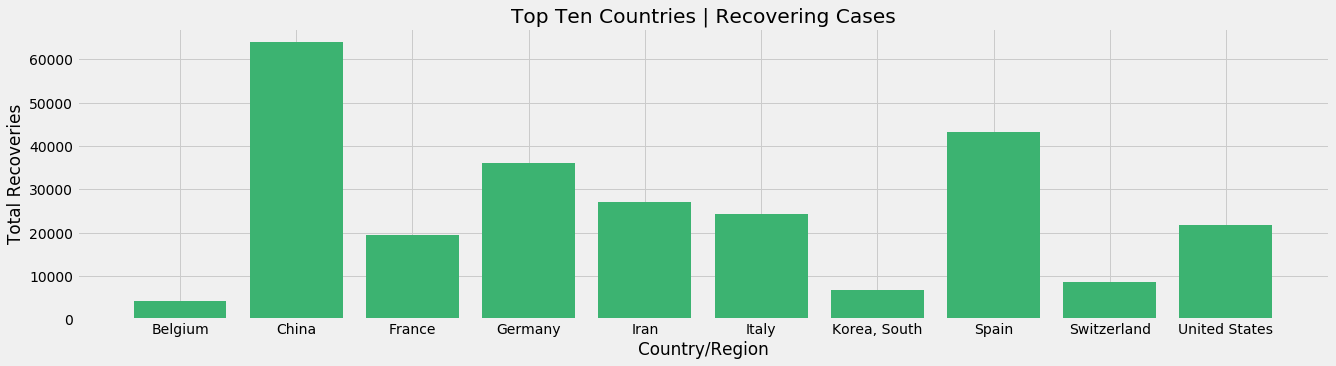

In [149]:
fig, ax = plt.subplots(figsize=(20,5))
plt.bar('Country/Region','Total Recovered', data=global_top10_recovered.groupby('Country/Region', as_index=False).sum(), color='mediumseagreen')
plt.title('Top Ten Countries | Recovering Cases')
plt.xlabel('Country/Region')
plt.ylabel('Total Recoveries');

Applying `.describe()` to the new dataset, the following statistics are evident:

+ The **average** number of cases resulting recovery per country is **26,897**.
+ The country with the **most** recoveries is China, with **77,410** cases resulting in death.
+ The **median** number of deaths due to coronavirus per country is **23,078**.

In [140]:
globalrecovered_groupby = globalrecovered_covid.groupby('Country/Region').agg( {'Total Recovered': ['sum']} )
globalrecovered_groupby

,Total Recovered
,sum
Country/Region,
Afghanistan,18
Albania,131
Algeria,113
Andorra,39
Angola,2
...,...
Vietnam,123
West Bank and Gaza,42


In [152]:
globalrecovered_covid_final = globalrecovered_groupby.sort_values(('Total Recovered', 'sum'), ascending=False).head(10)
globalrecovered_covid_final

,Total Recovered
,sum
Country/Region,
China,77410
Spain,43208
Germany,36081
Iran,27039
Italy,24392
United States,21763
France,19523
Switzerland,8704


In [153]:
globalrecovered_covid_final[('Total Recovered', 'sum')].describe()

count       10.000000
mean     26897.100000
std      21718.504207
min       4157.000000
25%      11408.750000
50%      23077.500000
75%      33820.500000
max      77410.000000
Name: (Total Recovered, sum), dtype: float64

The next part of my analysis required me to take a look at data from the World Health Organization (WHO).  I wanted to pull datasets housing information that could potentially be relevant to the spread of the coronavirus.

First, I pulled information on the adult mortality rate per country, or the probability of dying between 15 and 60 years per 1000 population.  The dataset had multiple years of information for each country, so I applied `.drop_duplicates()` to keep only the first (or most recent) record.  I then dropped the columns 'Male' and 'Female', as I only needed the information for both sexes for this analysis.

In [157]:
global_adult_mortality1 = pd.read_csv('adult_mortality_global.csv')
global_adult_mortality1

,Country,Year,Both sexes,Male,Female
0,Afghanistan,2016,245,272,216
1,Afghanistan,2015,233,254,210
2,Afghanistan,2014,234,254,213
3,Afghanistan,2013,235,254,215
4,Afghanistan,2012,242,262,221
...,...,...,...,...,...
3106,Zimbabwe,2004,694,725,670
3107,Zimbabwe,2003,697,728,671
3108,Zimbabwe,2002,695,728,667
3109,Zimbabwe,2001,688,723,656


In [158]:
global_adult_mortality = global_adult_mortality1.drop_duplicates(subset='Country', keep='first')
global_adult_mortality

,Country,Year,Both sexes,Male,Female
0,Afghanistan,2016,245,272,216
17,Albania,2016,96,122,71
34,Algeria,2016,95,106,84
51,Angola,2016,238,275,202
68,Antigua and Barbuda,2016,120,137,104
...,...,...,...,...,...
3026,Venezuela (Bolivarian Republic of),2016,157,217,93
3043,Viet Nam,2016,125,182,66
3060,Yemen,2016,221,244,199
3077,Zambia,2016,286,324,250


In [159]:
global_adult_mortality_final = global_adult_mortality.rename(columns={'Country': 'Country/Region'})
global_adult_mortality_final.drop(['Year', ' Male', ' Female'], axis=1, inplace=True)
global_adult_mortality_final

,Country/Region,Both sexes
0,Afghanistan,245
17,Albania,96
34,Algeria,95
51,Angola,238
68,Antigua and Barbuda,120
...,...,...
3026,Venezuela (Bolivarian Republic of),157
3043,Viet Nam,125
3060,Yemen,221
3077,Zambia,286


> ## US Analysis

The second part of my analysis was to analyze trends of the coronavirus on a national scale; rather, our national scale.  The coronavirus has had an impact on each and every one of our lives, from school and work closures to the loss of jobs.  I wanted to see which states were the most heavily impacted.

I pulled this dataset from the Humanitarian Data Exchange.  As seen below, it includes many columns of data.  Ultimately, I just wanted to keep 'Admin2', 'Province_State', 'Combined_Key' (this shows specific regions), and '4/7/2020' for the most recent data.

In [171]:
uscases_covid = pd.read_csv('time_series_covid19_confirmed_US.csv')
uscases_covid

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,56,58,69,77,82,84,93,112,113,121
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,0,0,2,6,6,6,6,6,6,6
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,127,174,239,286,316,316,452,475,513,573
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,23,30,30,30,30,37,40,42,43,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,84090053,US,USA,840,90053.0,Unassigned,Washington,US,0.0000,0.0000,...,125,274,274,303,344,501,483,533,648,677
3249,84090054,US,USA,840,90054.0,Unassigned,West Virginia,US,0.0000,0.0000,...,0,0,0,0,0,0,0,0,0,0
3250,84090055,US,USA,840,90055.0,Unassigned,Wisconsin,US,0.0000,0.0000,...,0,0,0,0,0,0,0,0,0,0
3251,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.0000,0.0000,...,0,0,0,0,0,0,0,0,0,0


In [170]:
uscases_covid.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4

In [172]:
uscases_covid.drop(uscases_covid.columns.difference(['Admin2', 'Province_State', 'Combined_Key', '4/7/20']), axis=1, inplace=True)
uscases_covid['Total Cases'] = uscases_covid.sum(1)
uscases_covid

,Admin2,Province_State,Combined_Key,4/7/20,Total Cases
0,NaN,American Samoa,"American Samoa, US",0,0
1,NaN,Guam,"Guam, US",121,121
2,NaN,Northern Mariana Islands,"Northern Mariana Islands, US",6,6
3,NaN,Puerto Rico,"Puerto Rico, US",573,573
4,NaN,Virgin Islands,"Virgin Islands, US",43,43
...,...,...,...,...,...
3248,Unassigned,Washington,"Unassigned, Washington, US",677,677
3249,Unassigned,West Virginia,"Unassigned, West Virginia, US",0,0
3250,Unassigned,Wisconsin,"Unassigned, Wisconsin, US",0,0
3251,Unassigned,Wyoming,"Unassigned, Wyoming, US",0,0


From the below dataset and plot, it is evident that **New York, New York** has the most confirmed cases in the United States, with **76,876** cases.  Cities in New York and New Jersey account for seven of the top ten locations.  The other three cities are located in Michigan, Illinois, and California.

To create the barplot, I used `plt.bar()`.  Unlike the global data barplots, it was not necessary to further filter by data by using a `.groupby()`.  Instead, I pulled the data for the barplot from the 'us_top10_cases' dataframe.

In [173]:
us_top10_cases = uscases_covid.sort_values('Total Cases', ascending=False).head(10)
us_top10_cases

,Admin2,Province_State,Combined_Key,4/7/20,Total Cases
1863,New York,New York,"New York City, New York, US",76876,76876
1862,Nassau,New York,"Nassau, New York, US",16610,16610
1884,Suffolk,New York,"Suffolk, New York, US",15561,15561
1892,Westchester,New York,"Westchester, New York, US",14294,14294
1317,Wayne,Michigan,"Wayne, Michigan, US",9045,9045
615,Cook,Illinois,"Cook, Illinois, US",8728,8728
1780,Bergen,New Jersey,"Bergen, New Jersey, US",7533,7533
209,Los Angeles,California,"Los Angeles, California, US",6936,6936
1876,Rockland,New York,"Rockland, New York, US",5990,5990
1785,Essex,New Jersey,"Essex, New Jersey, US",5078,5078


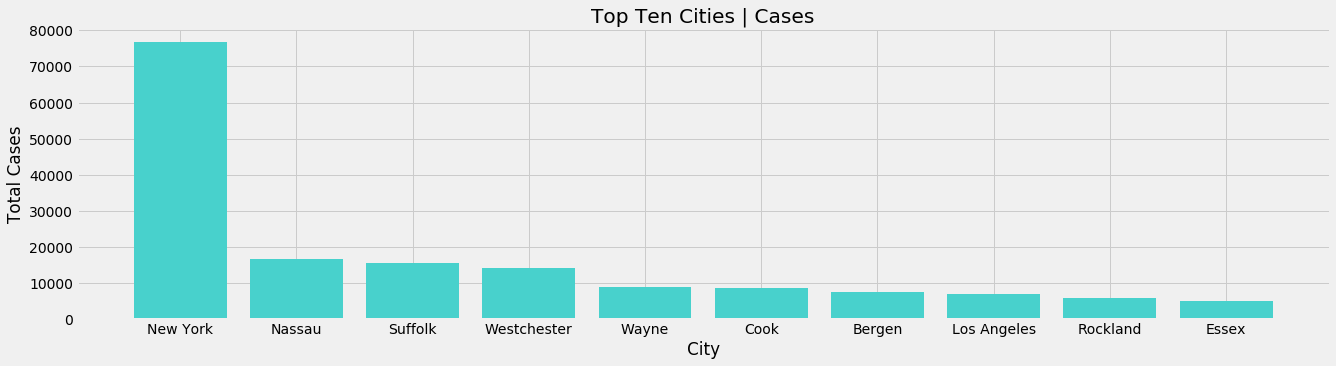

In [177]:
fig, ax = plt.subplots(figsize=(20,5))
plt.bar('Admin2','Total Cases', data=us_top10_cases, color='mediumturquoise')
plt.title('Top Ten Cities | Cases')
plt.xlabel('City')
plt.ylabel('Total Cases');

Next, I wanted to see what the top ten states were instead of just the cities.  To do so, I used a `.groupby().agg()` and then `.describe()` to analyze the data.

From the below, the following statistics are evident:
+ The **average number** of confirmed cases in the United States per state/territory is **6,831**.
+ The state with the **most** confirmed cases is New York, with **139,875** cases.  New Jersey, Michigan, and California are next, with 44,416 cases, 18,970 cases, and 17,351 cases, respectively.
+ The **median** number of confirmed COVID-19 cases per state is **1,351**.
+ Ohio is not on the top ten list!

In [178]:
uscases_covid_final = uscases_covid.groupby('Province_State').agg( {'Total Cases': ['sum']} )
uscases_covid_final

,Total Cases
,sum
Province_State,
Alabama,2169
Alaska,213
American Samoa,0
Arizona,2870
Arkansas,946
California,17351
Colorado,5429
Connecticut,7781


In [179]:
uscases_covid_groupby = uscases_covid_final.sort_values(('Total Cases', 'sum'), ascending=False).head(10)
uscases_covid_groupby

,Total Cases
,sum
Province_State,
New York,139875
New Jersey,44416
Michigan,18970
California,17351
Louisiana,16284
Massachusetts,15202
Pennsylvania,14853
Florida,14545


In [180]:
uscases_covid_final[('Total Cases', 'sum')].describe()

count        58.000000
mean       6831.396552
std       19225.820871
min           0.000000
25%         532.500000
50%        1351.500000
75%        5267.250000
max      139875.000000
Name: (Total Cases, sum), dtype: float64

The next dataset I pulled from the Humanitarian Data Exchange was for the number of deaths due to the coronavirus in the United States by state/territory.

I followed the same process as above to clean my data, using a variety of functions such as `.drop()`, `.sum()` to create new columns, and `.sort_values()`.

In [184]:
usdeaths_covid = pd.read_csv('time_series_covid19_deaths_US.csv')
usdeaths_covid

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,1,1,2,3,3,4,4,4,4,4
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,0,0,0,1,1,1,1,1,1,1
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,3,6,8,11,12,15,18,20,21,23
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,84090053,US,USA,840,90053.0,Unassigned,Washington,US,0.0000,0.0000,...,0,0,0,0,0,0,0,0,0,0
3249,84090054,US,USA,840,90054.0,Unassigned,West Virginia,US,0.0000,0.0000,...,0,0,0,0,1,0,0,0,0,0
3250,84090055,US,USA,840,90055.0,Unassigned,Wisconsin,US,0.0000,0.0000,...,0,0,0,0,5,4,4,0,0,0
3251,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.0000,0.0000,...,0,0,0,0,0,0,0,0,0,0


In [185]:
usdeaths_covid.drop(usdeaths_covid.columns.difference(['Admin2', 'Province_State', 'Combined_Key', '4/7/20']), axis=1, inplace=True)
usdeaths_covid['Total Deaths'] = usdeaths_covid.sum(1)
usdeaths_covid

,Admin2,Province_State,Combined_Key,4/7/20,Total Deaths
0,NaN,American Samoa,"American Samoa, US",0,0
1,NaN,Guam,"Guam, US",4,4
2,NaN,Northern Mariana Islands,"Northern Mariana Islands, US",1,1
3,NaN,Puerto Rico,"Puerto Rico, US",23,23
4,NaN,Virgin Islands,"Virgin Islands, US",1,1
...,...,...,...,...,...
3248,Unassigned,Washington,"Unassigned, Washington, US",0,0
3249,Unassigned,West Virginia,"Unassigned, West Virginia, US",0,0
3250,Unassigned,Wisconsin,"Unassigned, Wisconsin, US",0,0
3251,Unassigned,Wyoming,"Unassigned, Wyoming, US",0,0


From the below dataset and plot, it is evident that **New York, New York** has the most deaths due to coronavirus in the United States, with **4,009** deaths.  The top ten cities are located in New York, Michigan, New Jersey, Washington, and Illinois.

To create the barplot, I used `plt.bar()`.

In [187]:
us_top10_deaths = usdeaths_covid.sort_values('Total Deaths', ascending=False).head(10)
us_top10_deaths

,Admin2,Province_State,Combined_Key,4/7/20,Total Deaths
1863,New York,New York,"New York City, New York, US",4009,4009
1862,Nassau,New York,"Nassau, New York, US",500,500
1317,Wayne,Michigan,"Wayne, Michigan, US",402,402
1884,Suffolk,New York,"Suffolk, New York, US",263,263
1780,Bergen,New Jersey,"Bergen, New Jersey, US",263,263
1785,Essex,New Jersey,"Essex, New Jersey, US",232,232
2974,King,Washington,"King, Washington, US",230,230
1892,Westchester,New York,"Westchester, New York, US",211,211
615,Cook,Illinois,"Cook, Illinois, US",209,209
1298,Oakland,Michigan,"Oakland, Michigan, US",205,205


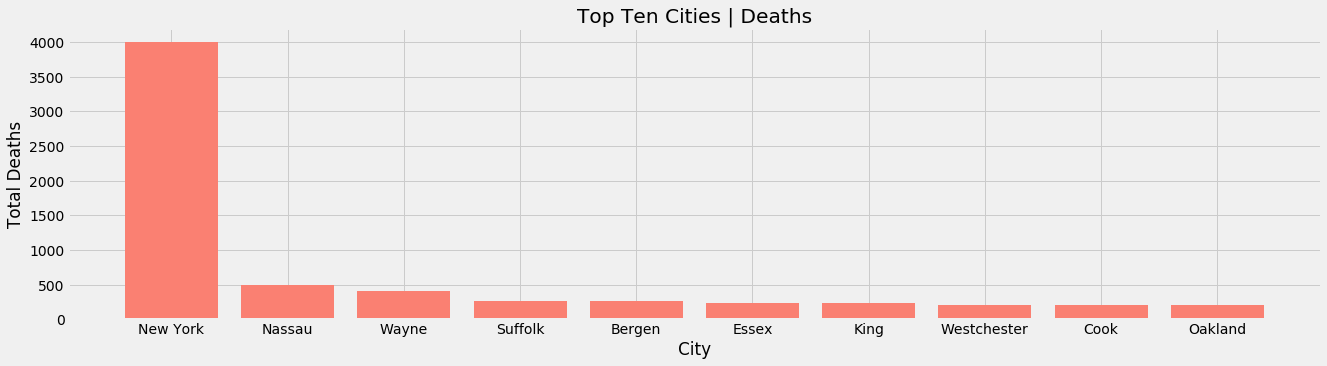

In [189]:
fig, ax = plt.subplots(figsize=(20,5))
plt.bar('Admin2','Total Deaths', data=us_top10_deaths, color='salmon')
plt.title('Top Ten Cities | Deaths')
plt.xlabel('City')
plt.ylabel('Total Deaths');

Next, like above, I wanted to see what the top ten states were instead of just the cities.  To do so, I used a `.groupby().agg()` and then `.describe()` to analyze the data.

From the below, the following statistics are evident:
+ The **average number** of deaths due to coronavirus in the United States per state/territory is **219**.
+ The state with the **most** deaths is New York, with **5,489** cases resulting in death.  New Jersey, Michigan, Louisiana, and California make up the rest of the top five.
+ The **median** number of deaths due to COVID-19 per state is **43**.

In [190]:
usdeaths_covid_final = usdeaths_covid.groupby('Province_State').agg( {'Total Deaths': ['sum']} )
usdeaths_covid_final

,Total Deaths
,sum
Province_State,
Alabama,64
Alaska,6
American Samoa,0
Arizona,73
Arkansas,18
California,432
Colorado,179
Connecticut,277


In [191]:
usdeaths_covid_groupby = usdeaths_covid_final.sort_values(('Total Deaths', 'sum'), ascending=False).head(10)
usdeaths_covid_groupby

,Total Deaths
,sum
Province_State,
New York,5489
New Jersey,1232
Michigan,845
Louisiana,582
California,432
Washington,400
Massachusetts,356
Georgia,329


In [192]:
usdeaths_covid_final[('Total Deaths', 'sum')].describe()

count      58.000000
mean      219.327586
std       737.373941
min         0.000000
25%        10.500000
50%        42.500000
75%       165.250000
max      5489.000000
Name: (Total Deaths, sum), dtype: float64

After analyzing the above data, I became curious -- even though New York has the most cases and deaths, how does their death rate due to coronavirus compare to other states?  New York is such a populous state in general (especially Manhattan), so are these high numbers just due to sheer population, or do they have the highest death rate as well?

To figure this out, I performed an inner join using `.merge()` to combine the 'Total Cases' and 'Total Deaths' columns I had previously created.  Then, I defined a function, 'death_rate' and applied it to the dataframe using `df.apply()`.

In [36]:
us_merge = pd.merge(uscases_covid_final, usdeaths_covid_final, on='Province_State')
us_merge

,Total Cases,Total Deaths
,sum,sum
Province_State,,
Alabama,2169,64
Alaska,213,6
American Samoa,0,0
Arizona,2870,73
Arkansas,946,18
California,17351,432
Colorado,5429,179
Connecticut,7781,277


In [37]:
def death_rate(row):
    death_rate = row['Total Deaths']/row['Total Cases']
    return death_rate

In [38]:
us_merge['Death Rate'] = us_merge.apply(death_rate, axis=1)
us_merge

,Total Cases,Total Deaths,Death Rate
,sum,sum,
Province_State,,,
Alabama,2169,64,0.029507
Alaska,213,6,0.028169
American Samoa,0,0,NaN
Arizona,2870,73,0.025436
Arkansas,946,18,0.019027
California,17351,432,0.024898
Colorado,5429,179,0.032971
Connecticut,7781,277,0.035600


From the below data, it is evident that although New York has the highest number of cases and deaths, it does not necessarily mean they are the 'worst' at treating the virus.  As seen below, the Northern Mariana Islands (a United States territory in the Pacific Ocean) actually has the highest death rate, with one of the six infected dying.  **Kentucky** has the **highest** death rate of the states, with a death rate of **5.66%**.

The state with the **lowest** death rate is **Wyoming**, having zero deaths thus far.

Summary functions below portray the following:
+ The **mean** death rate for the United States is **2.79%**.
+ The **maximum**, or largest, death rate is **16.67%** (as mentioned above with the Northern Mariana Islands).
+ The **minimum**, or smallest, death rate is **0%**.

In [194]:
us_merge_final = us_merge.sort_values('Death Rate', ascending=False).head(10)
us_merge_final

,Total Cases,Total Deaths,Death Rate
,sum,sum,
Province_State,,,
Northern Mariana Islands,6,1,0.166667
Kentucky,1149,65,0.056571
Washington,8692,400,0.046019
Oklahoma,1474,67,0.045455
Michigan,18970,845,0.044544
Puerto Rico,573,23,0.040140
Vermont,575,23,0.040000
New York,139875,5489,0.039242


In [195]:
us_merge['Death Rate'].mean()

0.027888855001658695

In [196]:
us_merge['Death Rate'].max()

0.16666666666666666

In [197]:
us_merge['Death Rate'].min()

0.0

> ## Ohio Analysis

In [43]:
ohio_covid = pd.read_csv('COVID_ohio.csv')
ohio_covid.drop(ohio_covid.tail(1).index,inplace=True)
ohio_covid.drop(['Date Of Death'], axis=1, inplace=True)
ohio_covid

,County,Sex,Age Range,Onset Date,Case Count,Death Count,Hospitalized Count
0,Adams,Male,40-49,3/29/2020,1,0,0
1,Adams,Male,50-59,3/30/2020,1,0,0
2,Allen,Female,30-39,3/21/2020,1,0,1
3,Allen,Female,40-49,3/23/2020,1,0,0
4,Allen,Female,40-49,3/25/2020,1,0,0
...,...,...,...,...,...,...,...
3458,Wyandot,Male,50-59,3/26/2020,1,0,0
3459,Wyandot,Male,50-59,3/29/2020,1,0,0
3460,Wyandot,Male,50-59,3/31/2020,1,0,0
3461,Wyandot,Male,60-69,3/12/2020,1,0,1


In [44]:
ohio_covid_final = ohio_covid.groupby('County').agg( {'Case Count': ['count'], 'Death Count': ['sum']} )
ohio_covid_final

,Case Count,Death Count
,count,sum
County,,
Adams,2,0
Allen,22,1
Ashland,3,0
Ashtabula,19,0
Athens,3,1
...,...,...
Washington,24,0
Wayne,29,0


In [45]:
ohio_covid_final[('Case Count', 'count')].mean()

41.72289156626506

> ## Conclusion

In [48]:
# Imported from the World Health Organization
global_health_statistics1 = pd.read_excel('health_population_data.xlsx')
global_health_statistics1.drop(['Country Code', 'Region Code', 'Survey Type'], axis=1, inplace=True)
global_health_statistics2 = global_health_statistics1.loc[global_health_statistics1['Subsample'] == 'Total']

In [49]:
# I am trying to obtain the most recent estimate of total population by filtering the dataset 'Subsample' to 'Total' and erasing the duplicate up to the last reported total population.
global_health_statistics = global_health_statistics2.drop_duplicates(subset='Country name', keep='last')
global_health_statistics

,Country name,Region,Year of Survey,Subsample,Total population,"Children, aged 0-14","Youth, aged 15-24","Adult, aged 25-64","Elderly, aged 65+",Urban Population (% of total Population),...,"Real Median Monthly Wages in USD (base 2010), PPP adjusted","Median Earnings for wage workers per month in agriculture, local nominal currenc","Median Earnings for wage workers per month in industry, local nominal currency","Median Earnings for wage workers per month in service, local nominal currency",Female to Male gender wage gap,Public to Private wage gap,No Education,Primary Education,Secondary Education,Post Secondary Education
15,Afghanistan,South Asia,2011,Total,2.695480e+07,0.484071,0.189436,0.301949,0.024543,0.227420,...,NaN,NaN,NaN,NaN,NaN,NaN,0.696500,0.158643,0.085555,0.059302
24,Angola,Sub-Saharan Africa,2008,Total,1.636788e+07,0.480743,0.194388,0.299872,0.024997,0.525395,...,NaN,NaN,NaN,NaN,NaN,NaN,0.229123,0.659513,0.092023,0.019341
75,Albania,Europe and Central Asia,2012,Total,2.802801e+06,0.203159,0.178950,0.502348,0.115542,0.540261,...,5284.041504,NaN,NaN,NaN,1.000000,1.166667,0.001542,0.055539,0.587063,0.355855
164,Armenia,Europe and Central Asia,2016,Total,2.983174e+06,0.190215,0.129134,0.549501,0.131150,0.625432,...,589.676880,72692.304688,124615.390625,98653.84375,0.625000,0.650000,0.002449,0.001326,0.411128,0.585097
223,Azerbaijan,Europe and Central Asia,2015,Total,8.332984e+06,0.206323,0.161189,0.550156,0.082332,0.586929,...,NaN,200.000000,300.000000,200.00000,0.596154,0.625000,0.011621,0.202935,0.785444,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6652,Vanuatu,East Asia and Pacific,2010,Total,2.498546e+05,0.397614,0.170540,0.398710,0.033137,0.258397,...,93.384666,11152.500000,10237.500000,11730.00000,0.899333,NaN,NaN,NaN,NaN,NaN
6669,"Yemen, Rep.",Middle East and North Africa,2005,Total,2.005296e+07,0.444756,0.222869,0.298030,0.034345,0.273824,...,NaN,0.000000,0.000000,18200.00000,1.379310,NaN,0.576371,0.053683,0.270260,0.099687
6753,South Africa,Sub-Saharan Africa,2017,Total,5.562049e+07,0.277632,0.185342,0.480803,0.056223,0.637094,...,NaN,NaN,NaN,NaN,NaN,NaN,0.033600,0.090358,0.559707,0.316335
6807,Zambia,Sub-Saharan Africa,2015,Total,1.547391e+07,0.354556,0.243862,0.372877,0.028705,0.418269,...,NaN,NaN,NaN,NaN,NaN,NaN,0.182576,0.222201,0.467939,0.127284


In [50]:
global_health_statistics_final = global_health_statistics.rename(columns={'Country name': 'Country/Region'})
global_health_statistics_final

,Country/Region,Region,Year of Survey,Subsample,Total population,"Children, aged 0-14","Youth, aged 15-24","Adult, aged 25-64","Elderly, aged 65+",Urban Population (% of total Population),...,"Real Median Monthly Wages in USD (base 2010), PPP adjusted","Median Earnings for wage workers per month in agriculture, local nominal currenc","Median Earnings for wage workers per month in industry, local nominal currency","Median Earnings for wage workers per month in service, local nominal currency",Female to Male gender wage gap,Public to Private wage gap,No Education,Primary Education,Secondary Education,Post Secondary Education
15,Afghanistan,South Asia,2011,Total,2.695480e+07,0.484071,0.189436,0.301949,0.024543,0.227420,...,NaN,NaN,NaN,NaN,NaN,NaN,0.696500,0.158643,0.085555,0.059302
24,Angola,Sub-Saharan Africa,2008,Total,1.636788e+07,0.480743,0.194388,0.299872,0.024997,0.525395,...,NaN,NaN,NaN,NaN,NaN,NaN,0.229123,0.659513,0.092023,0.019341
75,Albania,Europe and Central Asia,2012,Total,2.802801e+06,0.203159,0.178950,0.502348,0.115542,0.540261,...,5284.041504,NaN,NaN,NaN,1.000000,1.166667,0.001542,0.055539,0.587063,0.355855
164,Armenia,Europe and Central Asia,2016,Total,2.983174e+06,0.190215,0.129134,0.549501,0.131150,0.625432,...,589.676880,72692.304688,124615.390625,98653.84375,0.625000,0.650000,0.002449,0.001326,0.411128,0.585097
223,Azerbaijan,Europe and Central Asia,2015,Total,8.332984e+06,0.206323,0.161189,0.550156,0.082332,0.586929,...,NaN,200.000000,300.000000,200.00000,0.596154,0.625000,0.011621,0.202935,0.785444,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6652,Vanuatu,East Asia and Pacific,2010,Total,2.498546e+05,0.397614,0.170540,0.398710,0.033137,0.258397,...,93.384666,11152.500000,10237.500000,11730.00000,0.899333,NaN,NaN,NaN,NaN,NaN
6669,"Yemen, Rep.",Middle East and North Africa,2005,Total,2.005296e+07,0.444756,0.222869,0.298030,0.034345,0.273824,...,NaN,0.000000,0.000000,18200.00000,1.379310,NaN,0.576371,0.053683,0.270260,0.099687
6753,South Africa,Sub-Saharan Africa,2017,Total,5.562049e+07,0.277632,0.185342,0.480803,0.056223,0.637094,...,NaN,NaN,NaN,NaN,NaN,NaN,0.033600,0.090358,0.559707,0.316335
6807,Zambia,Sub-Saharan Africa,2015,Total,1.547391e+07,0.354556,0.243862,0.372877,0.028705,0.418269,...,NaN,NaN,NaN,NaN,NaN,NaN,0.182576,0.222201,0.467939,0.127284


In [51]:
global_health_statistics.columns

Index(['Country name', 'Region', 'Year of Survey', 'Subsample',
       'Total population', 'Children, aged 0-14', 'Youth, aged 15-24',
       'Adult, aged 25-64', 'Elderly, aged 65+',
       'Urban Population (% of total Population)',
       ' Working Age Population, aged 15-64 (% of total Pop.)',
       'Dependency Rate, all compared to 15-64',
       'Youth Dependency Rate, younger than 15 compared to 15-64',
       'Old Age Dependency Rate, older than 64 compared to 15-64',
       'Labor Force, aged 15-64', 'Labor Force Participation Rate, aged 15-64',
       'Female Labor Force Participation Rate, aged 15-64',
       'Not in labor force or education rate among youth, aged 15-24',
       'Employment to Population Ratio, aged 15-64',
       'Share of workers (aged 15-64) with more than one jobs in last week',
       'Employment to Labor Force Ratio, aged 15-64 ',
       'Unemployment Rate, aged 15-64',
       'Youth Employment to Labor Force Ratio, aged 15-24',
       'Youth Unemploy

In [52]:
global_health_statistics_final.drop(global_health_statistics_final.columns.difference(['Country/Region', 'Total population', 'Elderly, aged 65+', ' No Education']), axis=1, inplace=True)
global_health_statistics_final

,Country/Region,Total population,"Elderly, aged 65+",No Education
15,Afghanistan,2.695480e+07,0.024543,0.696500
24,Angola,1.636788e+07,0.024997,0.229123
75,Albania,2.802801e+06,0.115542,0.001542
164,Armenia,2.983174e+06,0.131150,0.002449
223,Azerbaijan,8.332984e+06,0.082332,0.011621
...,...,...,...,...
6652,Vanuatu,2.498546e+05,0.033137,NaN
6669,"Yemen, Rep.",2.005296e+07,0.034345,0.576371
6753,South Africa,5.562049e+07,0.056223,0.033600
6807,Zambia,1.547391e+07,0.028705,0.182576


In [53]:
# I am using a pivot table to confirm that each country has only one record of total population after filtering the data.
global_health_statistics.pivot_table(columns='Country name', index='Year of Survey',
                                    values='Total population')

Country name,Afghanistan,Albania,Angola,Armenia,Azerbaijan,Bangladesh,Belarus,Belize,Benin,Bhutan,...,Ukraine,United States,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,"Yemen, Rep.",Zambia,Zimbabwe
Year of Survey,,,,,,,,,,,,,,,,,,,,,
1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,243855.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,23559494.0,NaN,25625384.0,NaN,NaN,NaN,NaN
2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.005296e+07,NaN,NaN
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,1.636788e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)
global_health_gdp = pd.read_csv('health_percentageofgdp.csv')
global_health_gdp.drop(global_health_gdp.columns.difference(['Country', '2017']), axis=1, inplace=True)
global_health_gdp

,Country,2017
0,Afghanistan,11.8
1,Algeria,6.4
2,Andorra,10.3
3,Angola,2.8
4,Antigua and Barbuda,4.5
...,...,...
185,Venezuela (Bolivarian Republic of),1.2
186,Viet Nam,5.5
187,Yemen,NaN
188,Zambia,4.5


In [55]:
global_health_gdp_final = global_health_gdp.rename(columns={'Country': 'Country/Region'})
global_health_gdp_final

,Country/Region,2017
0,Afghanistan,11.8
1,Algeria,6.4
2,Andorra,10.3
3,Angola,2.8
4,Antigua and Barbuda,4.5
...,...,...
185,Venezuela (Bolivarian Republic of),1.2
186,Viet Nam,5.5
187,Yemen,NaN
188,Zambia,4.5


In [56]:
global_merge = pd.merge(globalcases_covid_final, globaldeaths_covid_final, on='Country/Region')
global_merge

,Total Cases,Total Deaths
,sum,sum
Country/Region,,
United States,396223,12722
Spain,141942,14045
Italy,135586,17127
France,110065,10343
Germany,107663,2016
China,82718,3335
Iran,62589,3872
United Kingdom,55949,6171


In [57]:
global_merge_final = pd.merge(global_merge, globalrecovered_covid_final, on='Country/Region')
global_merge_final

,Total Cases,Total Deaths,Total Recovered
,sum,sum,sum
Country/Region,,,
United States,396223,12722,21763
Spain,141942,14045,43208
Italy,135586,17127,24392
France,110065,10343,19523
Germany,107663,2016,36081
China,82718,3335,77410
Iran,62589,3872,27039
United Kingdom,55949,6171,325


In [58]:
def total_recovered(row):
    total_recovered = row['Total Recovered']/row['Total Cases']
    return total_recovered

In [59]:
global_merge_final['Recovery Rate'] = global_merge_final.apply(total_recovered, axis=1)
global_merge_final['Death Rate'] = global_merge_final.apply(death_rate, axis=1)
global_merge_final

,Total Cases,Total Deaths,Total Recovered,Recovery Rate,Death Rate
,sum,sum,sum,,
Country/Region,,,,,
United States,396223,12722,21763,0.054926,0.032108
Spain,141942,14045,43208,0.304406,0.098949
Italy,135586,17127,24392,0.179901,0.126318
France,110065,10343,19523,0.177377,0.093972
Germany,107663,2016,36081,0.335129,0.018725
China,82718,3335,77410,0.935830,0.040318
Iran,62589,3872,27039,0.432009,0.061864
United Kingdom,55949,6171,325,0.005809,0.110297


In [60]:
# Showing countries who have spent > five percent of their GDP on health improvements in 2017.
global_health_gdp_final.loc[global_health_gdp_final['2017'] > 5].sort_values('2017', ascending=False)

,Country/Region,2017
181,United States,17.1
175,Tuvalu,17.1
105,Marshall Islands,16.4
151,Sierra Leone,13.4
109,Micronesia (Federated States of),12.4
...,...,...
34,China,5.2
27,Cabo Verde,5.2
147,Saudi Arabia,5.2
138,Romania,5.2


In [61]:
# The following graph datset is a dataset I created myself, listing the continent location for each country.
# Because the majority of Russia's population resides in the Europe side, I labeled Russia's continent as Europe instead of Asia.
# The continent "Other" is because two of the "Country" labels are actually the cruise ships heavily infected with COVID-19.
continents = pd.read_excel('continents.xlsx')
continents

,Country,Continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa
...,...,...
183,Vietnam,Asia
184,West Bank and Gaza,Asia
185,Western Sahara,Africa
186,Zambia,Africa


In [62]:
final_continents = continents.rename(columns={'Country': 'Country/Region'})
final_continents

,Country/Region,Continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa
...,...,...
183,Vietnam,Asia
184,West Bank and Gaza,Asia
185,Western Sahara,Africa
186,Zambia,Africa


In [63]:
dfs = [final_continents, global_adult_mortality_final, global_health_statistics_final, global_merge_final, global_health_gdp_final]

In [64]:
df_final = reduce(lambda left,right: pd.merge(left,right,on='Country/Region', how='outer'), dfs)
df_final

C:\Users\katie\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,Country/Region,Continent,Both sexes,Total population,"Elderly, aged 65+",No Education,"(Total Cases, sum)","(Total Deaths, sum)","(Total Recovered, sum)","(Recovery Rate, )","(Death Rate, )",2017
0,Afghanistan,Asia,245.0,2.695480e+07,0.024543,0.696500,NaN,NaN,NaN,NaN,NaN,11.8
1,Albania,Europe,96.0,2.802801e+06,0.115542,0.001542,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,Africa,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.4
3,Andorra,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.3
4,Angola,Africa,238.0,1.636788e+07,0.024997,0.229123,NaN,NaN,NaN,NaN,NaN,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...
222,"Yemen, Rep.",NaN,NaN,2.005296e+07,0.034345,0.576371,NaN,NaN,NaN,NaN,NaN,NaN
223,Cook Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.3
224,Nauru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0
225,Niue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.6


In [65]:
df_final.columns

Index([          'Country/Region',                'Continent',
                    ' Both sexes',         'Total population',
              'Elderly, aged 65+',            ' No Education',
           ('Total Cases', 'sum'),    ('Total Deaths', 'sum'),
       ('Total Recovered', 'sum'),      ('Recovery Rate', ''),
               ('Death Rate', ''),                     '2017'],
      dtype='object')

In [66]:
global_final = df_final.rename(columns={' Both sexes': 'Adult Mortality Rate', '2017': 'Percentage of GDP on Health'})
global_final

,Country/Region,Continent,Adult Mortality Rate,Total population,"Elderly, aged 65+",No Education,"(Total Cases, sum)","(Total Deaths, sum)","(Total Recovered, sum)","(Recovery Rate, )","(Death Rate, )",Percentage of GDP on Health
0,Afghanistan,Asia,245.0,2.695480e+07,0.024543,0.696500,NaN,NaN,NaN,NaN,NaN,11.8
1,Albania,Europe,96.0,2.802801e+06,0.115542,0.001542,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,Africa,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.4
3,Andorra,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.3
4,Angola,Africa,238.0,1.636788e+07,0.024997,0.229123,NaN,NaN,NaN,NaN,NaN,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...
222,"Yemen, Rep.",NaN,NaN,2.005296e+07,0.034345,0.576371,NaN,NaN,NaN,NaN,NaN,NaN
223,Cook Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.3
224,Nauru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0
225,Niue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.6


In [67]:
global_final_model = global_final.fillna(0).sort_values('Percentage of GDP on Health', ascending=False).round(4)
global_final_model

,Country/Region,Continent,Adult Mortality Rate,Total population,"Elderly, aged 65+",No Education,"(Total Cases, sum)","(Total Deaths, sum)","(Total Recovered, sum)","(Recovery Rate, )","(Death Rate, )",Percentage of GDP on Health
179,United States,North America,114.0,3.134050e+08,0.1595,0.0071,396223.0,12722.0,21763.0,0.0549,0.0321,17.1
174,Tuvalu,Australia / Oceania,0.0,0.000000e+00,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,17.1
109,Marshall Islands,Australia / Oceania,0.0,0.000000e+00,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,16.4
152,Sierra Leone,Africa,389.0,5.054847e+06,0.0412,0.0031,0.0,0.0,0.0,0.0000,0.0000,13.4
113,Micronesia (Federated States of),Australia / Oceania,164.0,0.000000e+00,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,12.4
...,...,...,...,...,...,...,...,...,...,...,...,...
185,Western Sahara,Africa,0.0,0.000000e+00,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0
81,Iran,Asia,0.0,0.000000e+00,0.0000,0.0000,62589.0,3872.0,27039.0,0.4320,0.0619,0.0
75,Holy See,Europe,0.0,0.000000e+00,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0
141,Russia,Europe,0.0,0.000000e+00,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0


In [68]:
global_final_model['Continent'] = global_final_model['Continent'].replace(0, 'Other')
global_final_model

,Country/Region,Continent,Adult Mortality Rate,Total population,"Elderly, aged 65+",No Education,"(Total Cases, sum)","(Total Deaths, sum)","(Total Recovered, sum)","(Recovery Rate, )","(Death Rate, )",Percentage of GDP on Health
179,United States,North America,114.0,3.134050e+08,0.1595,0.0071,396223.0,12722.0,21763.0,0.0549,0.0321,17.1
174,Tuvalu,Australia / Oceania,0.0,0.000000e+00,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,17.1
109,Marshall Islands,Australia / Oceania,0.0,0.000000e+00,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,16.4
152,Sierra Leone,Africa,389.0,5.054847e+06,0.0412,0.0031,0.0,0.0,0.0,0.0000,0.0000,13.4
113,Micronesia (Federated States of),Australia / Oceania,164.0,0.000000e+00,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,12.4
...,...,...,...,...,...,...,...,...,...,...,...,...
185,Western Sahara,Africa,0.0,0.000000e+00,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0
81,Iran,Asia,0.0,0.000000e+00,0.0000,0.0000,62589.0,3872.0,27039.0,0.4320,0.0619,0.0
75,Holy See,Europe,0.0,0.000000e+00,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0
141,Russia,Europe,0.0,0.000000e+00,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0


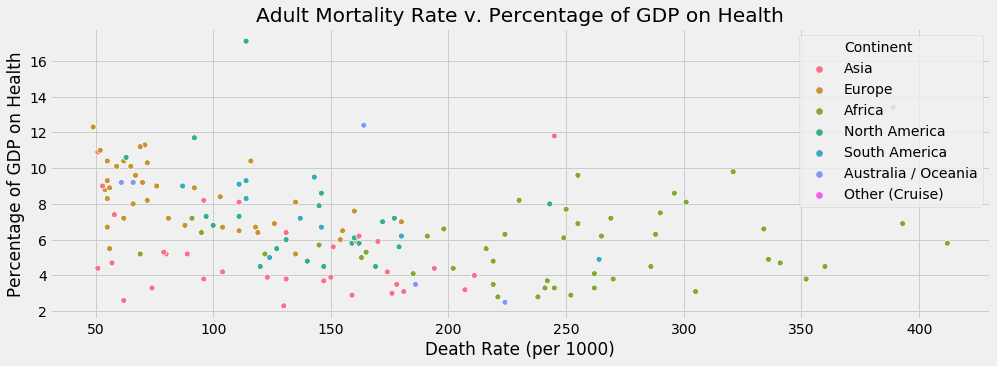

In [69]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Adult Mortality Rate', y='Percentage of GDP on Health', hue='Continent', data=global_final)
plt.xlabel('Death Rate (per 1000)')
plt.ylabel('Percentage of GDP on Health')
plt.title('Adult Mortality Rate v. Percentage of GDP on Health');

In [70]:
### LINEAR REGRESSION

In [71]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
X = global_final_model[['Percentage of GDP on Health']]
y = global_final_model[('Total Deaths', 'sum')]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [74]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
model.coef_, model.intercept_

(array([120.2321191]), -354.74530951687143)

In [76]:
unseen_x = pd.DataFrame({'Percentage of GDP on Health': [3, 4, 6, 9, 13]})
unseen_x

,Percentage of GDP on Health
0,3
1,4
2,6
3,9
4,13


In [77]:
unseen_y = model.predict(unseen_x)
unseen_y

array([   5.95104779,  126.18316689,  366.64740509,  727.3437624 ,
       1208.27223881])

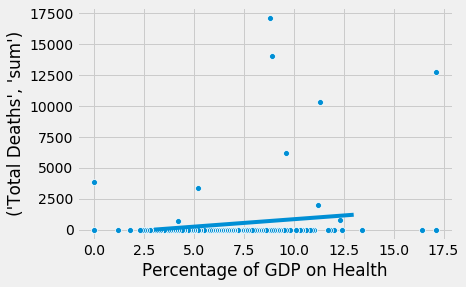

In [78]:
sns.scatterplot(x='Percentage of GDP on Health', y=('Total Deaths', 'sum'), data=global_final_model)
sns.lineplot(x=unseen_x['Percentage of GDP on Health'], y=unseen_y);

In [79]:
model.score(X_test, y_test)

0.02359117698010027

In [80]:
## CLASSIFICATION

In [81]:
feature_cols = ['Adult Mortality Rate', 'Elderly, aged 65+', ('Total Cases', 'sum'), ('Total Deaths', 'sum'), 
                ('Total Recovered', 'sum'), 'Percentage of GDP on Health']
target_col = 'Continent'
X = global_final_model[feature_cols]
y = global_final_model[target_col]

In [82]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=12)

In [83]:
model = GaussianNB()

In [84]:
model.fit(Xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [85]:
model.score(Xtest, ytest)

0.2982456140350877

In [86]:
new_country = {'Adult Mortality Rate': 244, 'Elderly, aged 65+': 0.05, 
               ('Total Cases', 'sum'): 240, ('Total Deaths', 'sum'): 44, ('Total Recovered', 'sum'): 500,
               'Percentage of GDP on Health': 6}
X_new = pd.DataFrame([new_country])
X_new

,Adult Mortality Rate,"Elderly, aged 65+","(Total Cases, sum)","(Total Deaths, sum)","(Total Recovered, sum)",Percentage of GDP on Health
0,244,0.05,240,44,500,6


In [87]:
model.predict(X_new)

array(['Asia'], dtype='<U19')

In [88]:
### DECISION TREE

In [89]:
decision_tree = DecisionTreeClassifier(random_state=12)

In [90]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=12)

In [91]:
decision_tree.fit(Xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12, splitter='best')

In [92]:
decision_tree.score(Xtest, ytest)

0.3684210526315789

In [93]:
decision_tree.predict(X_new)

array(['North America'], dtype=object)

In [94]:
### DECISION TREE, ADDING MORE VARIABLES

In [95]:
feature_cols = ['Adult Mortality Rate', 'Total population', 'Elderly, aged 65+', ('Total Cases', 'sum'), 
                ('Total Deaths', 'sum'), ('Death Rate', ''), 'Percentage of GDP on Health']
target_col = 'Continent'
X = global_final_model[feature_cols]
y = global_final_model[target_col]

In [96]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=12)

In [97]:
decision_tree = DecisionTreeClassifier(random_state=12)

In [98]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=12)

In [99]:
decision_tree.fit(Xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12, splitter='best')

In [100]:
new_country = {'Adult Mortality Rate': 244, 'Total population': 6.07e+06, 'Elderly, aged 65+': 0.05, 
               ('Total Cases', 'sum'): 240, ('Total Deaths', 'sum'): 44, ('Death Rate', ''):0.0045, 'Percentage of GDP on Health': 6}
X_new = pd.DataFrame([new_country])
X_new

,Adult Mortality Rate,Total population,"Elderly, aged 65+","(Total Cases, sum)","(Total Deaths, sum)","(Death Rate, )",Percentage of GDP on Health
0,244,6070000.0,0.05,240,44,0.0045,6


In [101]:
decision_tree.score(Xtest, ytest)

0.3508771929824561

In [102]:
decision_tree.predict(X_new)

array(['North America'], dtype=object)

In [103]:
### NEW LINEAR, DROPPING NAs

In [104]:
global_final_modelv1 = global_final.dropna().sort_values('Percentage of GDP on Health', ascending=False).round(4)
global_final_modelv1

,Country/Region,Continent,Adult Mortality Rate,Total population,"Elderly, aged 65+",No Education,"(Total Cases, sum)","(Total Deaths, sum)","(Total Recovered, sum)","(Recovery Rate, )","(Death Rate, )",Percentage of GDP on Health
179,United States,North America,114.0,3.134050e+08,0.1595,0.0071,396223.0,12722.0,21763.0,0.0549,0.0321,17.1
36,China,Asia,80.0,1.355121e+09,0.0936,0.0449,82718.0,3335.0,77410.0,0.9358,0.0403,5.2


In [105]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
X = global_final_modelv1[['Elderly, aged 65+']]
y = global_final_modelv1[('Total Cases', 'sum')]

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [108]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
model.coef_, model.intercept_

(array([0.]), 396223.0)

In [110]:
unseen_x = pd.DataFrame({'Elderly, aged 65+': [0.0412, 0.0612, 0.05, 0.1412, 0.021]})
unseen_x

,"Elderly, aged 65+"
0,0.0412
1,0.0612
2,0.0500
3,0.1412
4,0.0210


In [111]:
unseen_y = model.predict(unseen_x)
unseen_y

array([396223., 396223., 396223., 396223., 396223.])

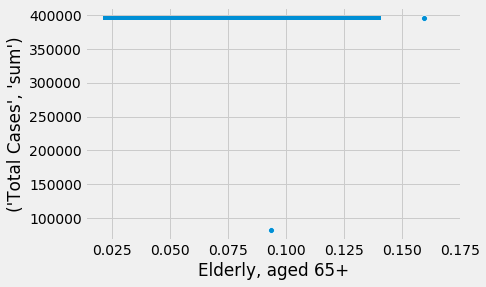

In [112]:
sns.scatterplot(x='Elderly, aged 65+', y=('Total Cases', 'sum'), data=global_final_modelv1)
sns.lineplot(x=unseen_x['Elderly, aged 65+'], y=unseen_y);

In [113]:
model.score(X_test, y_test)

C:\Users\katie\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


nan